#Libraries

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Data

In [ ]:
train = pd.read_csv('Features_TP2_train1.csv')
validation = pd.read_csv('Features_TP2_val1.csv')
test = pd.read_csv('Features_TP2_test1.csv')

### id ###
train = train.drop(['id','nouns','adjetives','verbs','tags'], axis = 1)

validation_id = list(validation['id'])
validation = validation.drop(['id','nouns','adjetives','verbs','tags'], axis = 1)

test_id = list(test.id)
test = test.drop(['id','nouns','adjetives','verbs','tags'], axis = 1)

### target ###
y_train = list(train.target)
y_validation = list(validation.target)

train = train.drop('target',axis = 1)
validation = validation.drop('target',axis = 1)

space = ' '

In [ ]:
# categorical to numeric

train.contain_location = train.contain_location.apply(lambda x: 1 if (x == 'YES') else 0)
validation.contain_location = validation.contain_location.apply(lambda x: 1 if (x == 'YES') else 0)
test.contain_location = test.contain_location.apply(lambda x: 1 if (x == 'YES') else 0)

train.have_keyword = train.have_keyword.apply(lambda x: 1 if (x == 'YES') else 0)
validation.have_keyword = validation.have_keyword.apply(lambda x: 1 if (x == 'YES') else 0)
test.have_keyword = test.have_keyword.apply(lambda x: 1 if (x == 'YES') else 0)

#Parameters Tuning

##Estimators

###Criterion: "gini"

In [ ]:
y = []
estimators = range(100,1001,10)

print('Estimators Tuning...\n')

for n in estimators:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n, criterion = 'gini')
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training Random Forest: Estimators -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best n_estimator is ',estimators[y.index(max(y))],' with ',max(y),' accuracy')

Estimators Tuning...

Training Random Forest: Estimators ->  100 ... Score:  0.7426132632961261 

Training Random Forest: Estimators ->  110 ... Score:  0.747866053841103 

Training Random Forest: Estimators ->  120 ... Score:  0.7445830597504924 

Training Random Forest: Estimators ->  130 ... Score:  0.7419566644780039 

Training Random Forest: Estimators ->  140 ... Score:  0.7419566644780039 

Training Random Forest: Estimators ->  150 ... Score:  0.7439264609323704 

Training Random Forest: Estimators ->  160 ... Score:  0.7419566644780039 

Training Random Forest: Estimators ->  170 ... Score:  0.7439264609323704 

Training Random Forest: Estimators ->  180 ... Score:  0.7452396585686146 

Training Random Forest: Estimators ->  190 ... Score:  0.7452396585686146 

Training Random Forest: Estimators ->  200 ... Score:  0.747866053841103 

Training Random Forest: Estimators ->  210 ... Score:  0.7439264609323704 

Training Random Forest: Estimators ->  220 ... Score:  0.74392646093

###Visualization

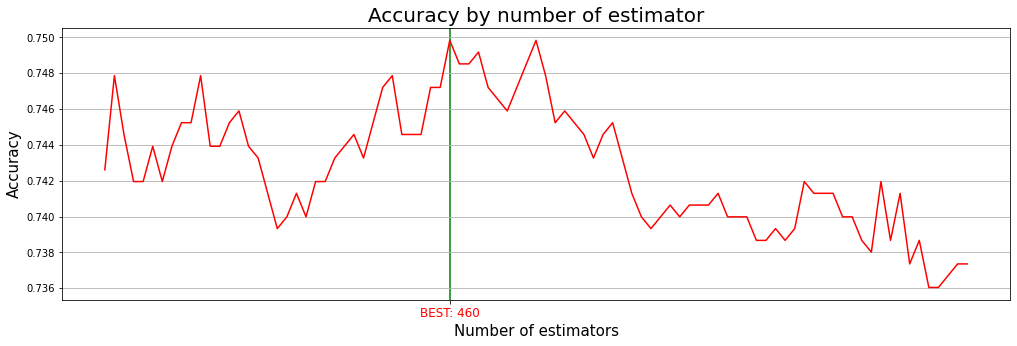

In [ ]:
x = estimators
n_estimator = estimators[y.index(max(y))]
tick = 'BEST' + ': ' + str(n_estimator)
plt.figure(figsize=(17,5))
plt.title('Accuracy by number of estimator',fontsize = 20)
plt.xlabel('Number of estimators', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([n_estimator],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'red',grid_color = 'green', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'red')
plt.show()

###Criterion: entropy

In [ ]:
y = []
estimators = range(200,601,25)

print('Estimators Tuning...\n')

for n in estimators:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n, criterion = 'entropy')
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training Random Forest: Estimators -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best n_estimator is ',estimators[y.index(max(y))],' with ',max(y),' accuracy')

Estimators Tuning...

Training Random Forest: Estimators ->  200 ... Score:  0.7458962573867367 

Training Random Forest: Estimators ->  225 ... Score:  0.7439264609323704 

Training Random Forest: Estimators ->  250 ... Score:  0.7413000656598818 

Training Random Forest: Estimators ->  275 ... Score:  0.7426132632961261 

Training Random Forest: Estimators ->  300 ... Score:  0.7458962573867367 

Training Random Forest: Estimators ->  325 ... Score:  0.7445830597504924 

Training Random Forest: Estimators ->  350 ... Score:  0.7465528562048588 

Training Random Forest: Estimators ->  375 ... Score:  0.7419566644780039 

Training Random Forest: Estimators ->  400 ... Score:  0.7399868680236376 

Training Random Forest: Estimators ->  425 ... Score:  0.7426132632961261 

Training Random Forest: Estimators ->  450 ... Score:  0.7419566644780039 

Training Random Forest: Estimators ->  475 ... Score:  0.7413000656598818 

Training Random Forest: Estimators ->  500 ... Score:  0.744583059

###Visualization

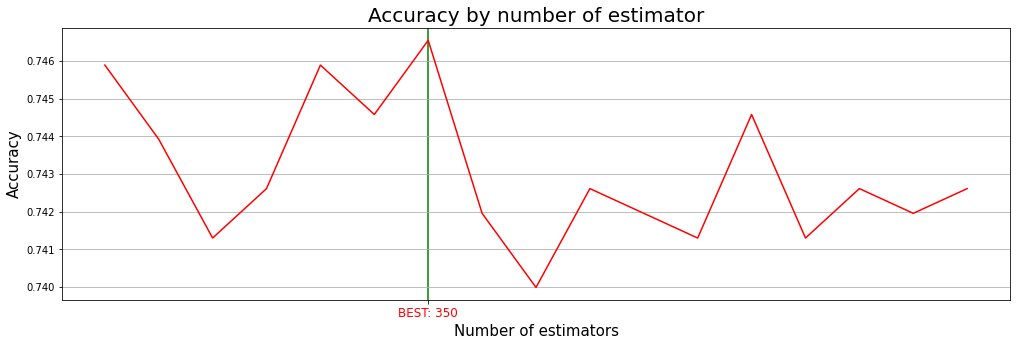

In [ ]:
x = estimators
n_estimator = estimators[y.index(max(y))]
tick = 'BEST' + ': ' + str(n_estimator)
plt.figure(figsize=(17,5))
plt.title('Accuracy by number of estimator',fontsize = 20)
plt.xlabel('Number of estimators', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([n_estimator],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'red',grid_color = 'green', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'red')
plt.show()

"Afino punteria" utilizando criterio gini que obtuvo un mayor accuracy

In [ ]:
y = []
estimators = range(450,521)

print('Estimators Tuning...\n')

for n in estimators:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n, criterion = 'gini')
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training XGBClassifier: Estimators -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best n_estimator is ',estimators[y.index(max(y))],' with ',max(y),' accuracy')

Estimators Tuning...

Training XGBClassifier: Estimators ->  450 ... Score:  0.747209455022981 

Training XGBClassifier: Estimators ->  451 ... Score:  0.7465528562048588 

Training XGBClassifier: Estimators ->  452 ... Score:  0.747209455022981 

Training XGBClassifier: Estimators ->  453 ... Score:  0.747209455022981 

Training XGBClassifier: Estimators ->  454 ... Score:  0.747866053841103 

Training XGBClassifier: Estimators ->  455 ... Score:  0.747209455022981 

Training XGBClassifier: Estimators ->  456 ... Score:  0.747209455022981 

Training XGBClassifier: Estimators ->  457 ... Score:  0.7485226526592252 

Training XGBClassifier: Estimators ->  458 ... Score:  0.747866053841103 

Training XGBClassifier: Estimators ->  459 ... Score:  0.7498358502954695 

Training XGBClassifier: Estimators ->  460 ... Score:  0.7498358502954695 

Training XGBClassifier: Estimators ->  461 ... Score:  0.7504924491135916 

Training XGBClassifier: Estimators ->  462 ... Score:  0.7485226526592252

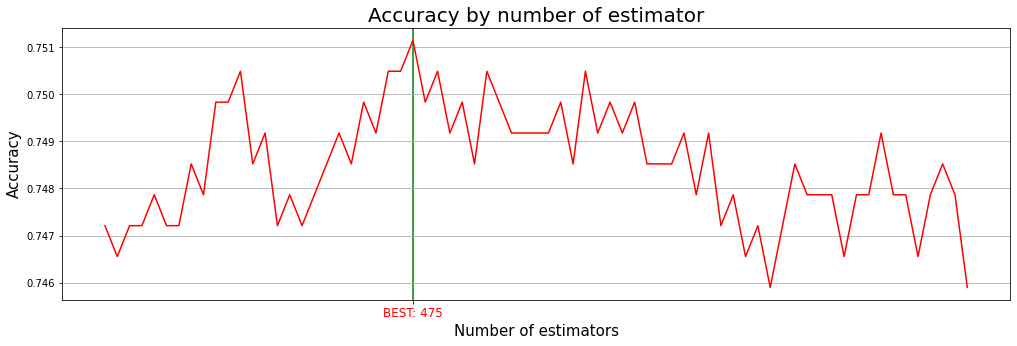

In [ ]:
x = estimators
n_estimator = estimators[y.index(max(y))]
tick = 'BEST' + ': ' + str(n_estimator)
plt.figure(figsize=(17,5))
plt.title('Accuracy by number of estimator',fontsize = 20)
plt.xlabel('Number of estimators', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([n_estimator],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'red',grid_color = 'green', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'red')
plt.show()

#Max_depth

In [ ]:
depths = range(20,41)
y.clear()

#Tomo la cantidad de estimadores que maximizo el anterior cross validation
n_estimator = 475

#Tomo como criterio 'gini'

print('Depth Tuning...\n')

for n in depths:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n_estimator, criterion = 'gini', max_depth = n)
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training Random Forest: Max depth -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best depth is ',depths[y.index(max(y))],' with ',max(y),' accuracy')

Depth Tuning...

Training Random Forest: Max depth ->  20 ... Score:  0.7498358502954695 

Training Random Forest: Max depth ->  21 ... Score:  0.7491792514773473 

Training Random Forest: Max depth ->  22 ... Score:  0.7498358502954695 

Training Random Forest: Max depth ->  23 ... Score:  0.7537754432042022 

Training Random Forest: Max depth ->  24 ... Score:  0.7498358502954695 

Training Random Forest: Max depth ->  25 ... Score:  0.747866053841103 

Training Random Forest: Max depth ->  26 ... Score:  0.7458962573867367 

Training Random Forest: Max depth ->  27 ... Score:  0.7498358502954695 

Training Random Forest: Max depth ->  28 ... Score:  0.747866053841103 

Training Random Forest: Max depth ->  29 ... Score:  0.7498358502954695 

Training Random Forest: Max depth ->  30 ... Score:  0.7485226526592252 

Training Random Forest: Max depth ->  31 ... Score:  0.7504924491135916 

Training Random Forest: Max depth ->  32 ... Score:  0.7511490479317138 

Training Random Forest:

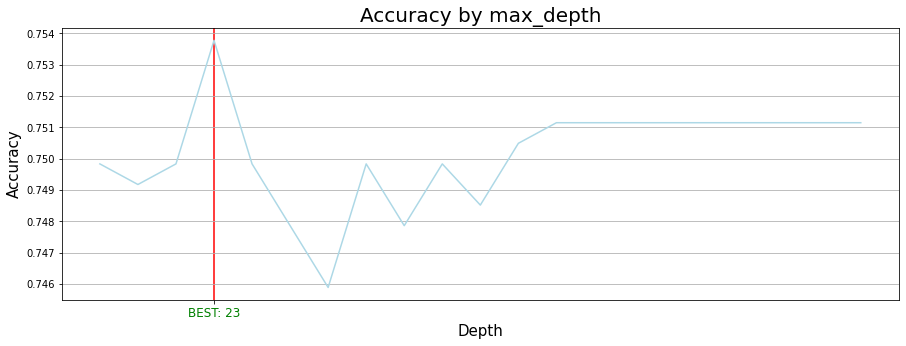

In [ ]:
x = depths
depth = depths[y.index(max(y))]
tick = 'BEST' + ': ' + str(depth)
plt.figure(figsize=(15,5))
plt.title('Accuracy by max_depth',fontsize = 20)
plt.xlabel('Depth', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([depth],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'green',grid_color = 'red', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'lightblue')
plt.show()

#Min_samples_split

In [ ]:
y.clear()
samples_split = [2,3,4,5,6,7,8,9,10,11,12]

print('Sample split Tuning...\n')

for n in samples_split:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n_estimator, criterion = 'gini', max_depth = depth, min_samples_split = n)
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training Random Forest: Sample split -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best sample split is ',samples_split[y.index(max(y))],' with ',max(y),' accuracy')

Sample split Tuning...

Training Random Forest: Sample split ->  2 ... Score:  0.7537754432042022 

Training Random Forest: Sample split ->  3 ... Score:  0.747209455022981 

Training Random Forest: Sample split ->  4 ... Score:  0.7432698621142482 

Training Random Forest: Sample split ->  5 ... Score:  0.7445830597504924 

Training Random Forest: Sample split ->  6 ... Score:  0.7393302692055155 

Training Random Forest: Sample split ->  7 ... Score:  0.7445830597504924 

Training Random Forest: Sample split ->  8 ... Score:  0.7432698621142482 

Training Random Forest: Sample split ->  9 ... Score:  0.7445830597504924 

Training Random Forest: Sample split ->  10 ... Score:  0.737360472751149 

Training Random Forest: Sample split ->  11 ... Score:  0.7399868680236376 

Training Random Forest: Sample split ->  12 ... Score:  0.7419566644780039 

DONE!

The best sample split is  2  with  0.7537754432042022  accuracy


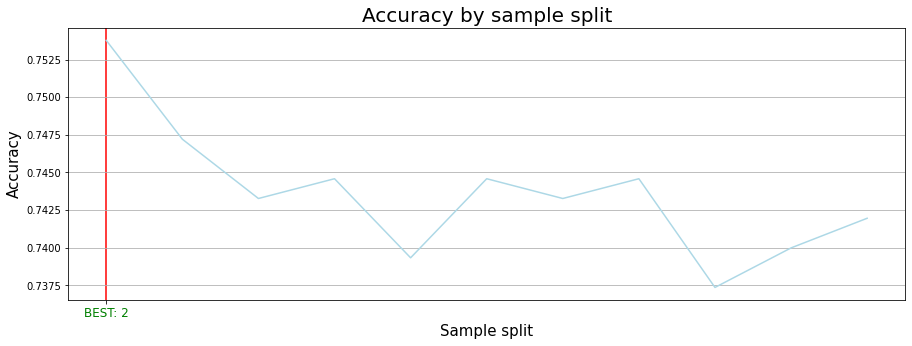

In [ ]:
x = samples_split
sample_split = samples_split[y.index(max(y))]
tick = 'BEST' + ': ' + str(sample_split)
plt.figure(figsize=(15,5))
plt.title('Accuracy by sample split',fontsize = 20)
plt.xlabel('Sample split', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([sample_split],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'green',grid_color = 'red', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'lightblue')
plt.show()

#Max_features

In [ ]:
y.clear()
features = range(2,20)

print('Max features Tuning...\n')

for n in features:
  model = RandomForestClassifier(random_state = 0, n_estimators = n_estimator, criterion = 'gini', max_depth = depth, min_samples_split = sample_split,\
                                 max_features = n)
  model.fit(train, y_train)
  score = model.score(validation,y_validation)
  print('Training Random Forest:  Max features -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best max number of features is ',features[y.index(max(y))],' with ',max(y),' accuracy')

Max features Tuning...

Training Random Forest:  Max features ->  2 ... Score:  0.7248850952068286 

Training Random Forest:  Max features ->  3 ... Score:  0.7307944845699278 

Training Random Forest:  Max features ->  4 ... Score:  0.7386736703873933 

Training Random Forest:  Max features ->  5 ... Score:  0.7360472751149048 

Training Random Forest:  Max features ->  6 ... Score:  0.7432698621142482 

Training Random Forest:  Max features ->  7 ... Score:  0.7406434668417596 

Training Random Forest:  Max features ->  8 ... Score:  0.7419566644780039 

Training Random Forest:  Max features ->  9 ... Score:  0.7452396585686146 

Training Random Forest:  Max features ->  10 ... Score:  0.7399868680236376 

Training Random Forest:  Max features ->  11 ... Score:  0.7439264609323704 

Training Random Forest:  Max features ->  12 ... Score:  0.7445830597504924 

Training Random Forest:  Max features ->  13 ... Score:  0.7419566644780039 

Training Random Forest:  Max features ->  14 ...

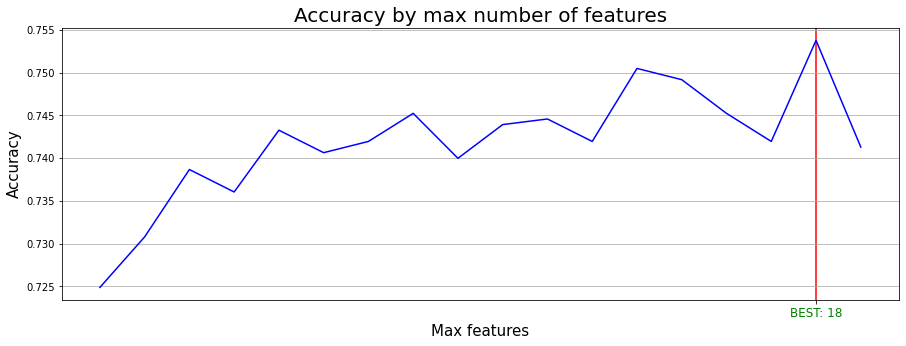

In [ ]:
x = features
max_features = features[y.index(max(y))]
tick = 'BEST' + ': ' + str(max_features)
plt.figure(figsize=(15,5))
plt.title('Accuracy by max number of features',fontsize = 20)
plt.xlabel('Max features', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([max_features],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'green',grid_color = 'red', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'blue')
plt.show()

#MODELO

In [ ]:
model = RandomForestClassifier(random_state = 0,n_estimators = n_estimator,criterion = 'gini', max_depth = depth, min_samples_split = sample_split,\
                               max_features = max_features)
model.fit(train, y_train)
print(model.score(train,y_train))
print(model.score(validation,y_validation))

0.9944170771756978
0.7537754432042022


In [ ]:
prediction_test = model.predict(test)
prediction_val = model.predict(validation)

In [ ]:
(pd.DataFrame({'id':test_id,'target':prediction_test})).to_csv('TEST_prediction_model2.csv',header = True, index = False)

In [ ]:
(pd.DataFrame({'id':validation_id,'target':prediction_val})).to_csv('VAL_prediction_model2.csv',header = True, index = False)